In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Load data

**stgs3_4_data:**

Parameters from which conditional vectors will be created.

****

In [2]:
# Load the data using Pandas
df = pd.read_csv('stgs3_4_data.txt', sep='\t', skiprows=46)  # Adjust the number of rows to skip based on the file header
df = df.dropna()  # Drop rows with any NaN values
df['Time'] = pd.to_datetime(df['Time'])  # Convert 'Time' column to datetime

df['Stage3_Stepper'] = df['L1-PL1-MTR29:RawPos Value'].str.replace(',', '').astype(float)
df['Stage4_Stepper'] = df['L1-PL2-MTR09:RawPos Value'].str.replace(',', '').astype(float)

df.drop(columns=['L1-PL1-MTR29:RawPos Value', 'L1-PL2-MTR09:RawPos Value'], inplace=True)

# Rename columns for easier access (including the new split columns)
df.columns = ['Time', 'Stage3_OutputPower', 'Stage3_Piezo', 'Stage4_OutputPower', 'Stage4_Piezo', 
              'Stage3_Stepper', 'Stage4_Stepper']

In [3]:
df.head()

,Time,Stage3_OutputPower,Stage3_Piezo,Stage4_OutputPower,Stage4_Piezo,Stage3_Stepper,Stage4_Stepper
5,2024-06-14 18:46:29.766817093,0.017161,0.0,0.083602,0.0,-176387.0,-289957.0
6,2024-06-17 08:58:45.360144138,0.017161,0.0,0.153892,0.0,-176387.0,-289957.0
7,2024-06-17 08:58:45.609766960,0.072318,0.0,0.153892,0.0,-176387.0,-289957.0
8,2024-06-17 08:58:46.115516186,0.072318,0.0,0.223622,0.0,-176387.0,-289957.0
9,2024-06-17 08:58:46.396927834,0.072318,0.0,0.089850,0.0,-176387.0,-289957.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 5 to 13204
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Time                13200 non-null  datetime64[ns]
 1   Stage3_OutputPower  13200 non-null  float64       
 2   Stage3_Piezo        13200 non-null  float64       
 3   Stage4_OutputPower  13200 non-null  float64       
 4   Stage4_Piezo        13200 non-null  float64       
 5   Stage3_Stepper      13200 non-null  float64       
 6   Stage4_Stepper      13200 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 825.0 KB


**processed_stg3spec and processed_stg4spec**:

Processed data containing info about spectrum wevelengths' intensities in time from stages 3 and 4.

In [5]:
processed_stg3 = pd.read_csv('processed_stg3spec.csv')

# Convert the 'Time' column in processed_stg3 to datetime format
processed_stg3['Time'] = pd.to_datetime(processed_stg3['Time'])

processed_stg4 = pd.read_csv('processed_stg4spec.csv')

# Convert the 'Time' column in processed_stg3 to datetime format
processed_stg4['Time'] = pd.to_datetime(processed_stg4['Time'])

In [6]:
processed_stg3.head()

,Time,Intensities,Wavelengths
0,2024-06-17 06:59:58.119980812,"[-2.583013, -4.878997, -2.094142, 6.856287, -1...","[634.835144, 635.296997, 635.758911, 636.22082..."
1,2024-06-17 06:59:59.127299309,"[1.416987, -2.878997, -4.094142, 7.856287, -2....","[634.835144, 635.296997, 635.758911, 636.22082..."
2,2024-06-17 07:00:00.491611004,"[3.416987, -1.878997, -5.094142, 5.856287, -0....","[634.835144, 635.296997, 635.758911, 636.22082..."
3,2024-06-17 07:00:01.443612099,"[-1.583013, -1.878997, -3.094142, 7.856287, 0....","[634.835144, 635.296997, 635.758911, 636.22082..."
4,2024-06-17 07:00:02.498609543,"[-1.583013, -1.878997, -3.094142, 3.856287, 1....","[634.835144, 635.296997, 635.758911, 636.22082..."


In [7]:
processed_stg4.head()

,Time,Intensities,Wavelengths
0,2024-06-17 06:59:58.219983101,"[4.04433, -10.42062, -9.35264, 10.78973, -2.92...","[634.83514, 635.297, 635.75891, 636.22083, 636..."
1,2024-06-17 06:59:59.279932976,"[10.04433, -4.42062, -3.35264, 0.78973, -0.921...","[634.83514, 635.297, 635.75891, 636.22083, 636..."
2,2024-06-17 07:00:00.640610218,"[8.04433, -2.42062, -5.35264, 18.78973, 1.0785...","[634.83514, 635.297, 635.75891, 636.22083, 636..."
3,2024-06-17 07:00:01.593612194,"[6.04433, -8.42062, -7.35264, 0.78973, -0.9214...","[634.83514, 635.297, 635.75891, 636.22083, 636..."
4,2024-06-17 07:00:02.548612118,"[6.04433, -4.42062, -7.35264, 0.78973, -10.921...","[634.83514, 635.297, 635.75891, 636.22083, 636..."


In [32]:
len(df)

13200

In [31]:
len(processed_stg4)

291905

# Parameters analysis

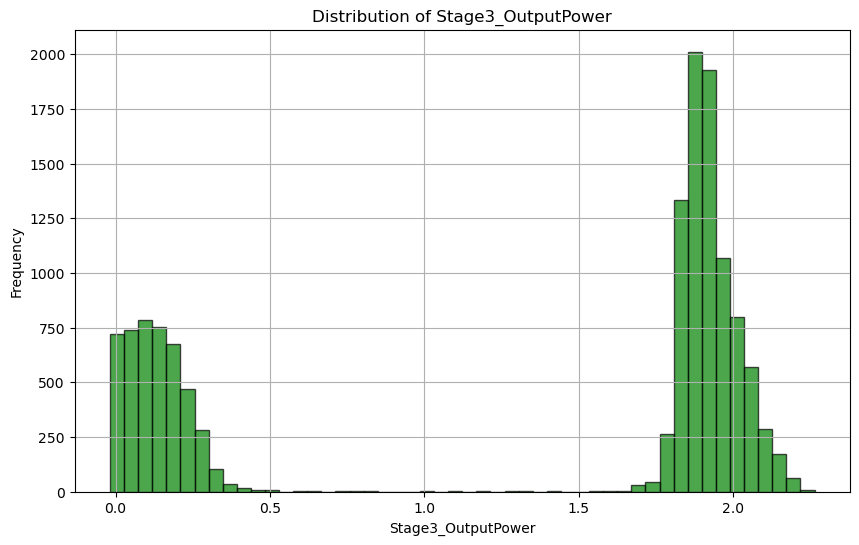

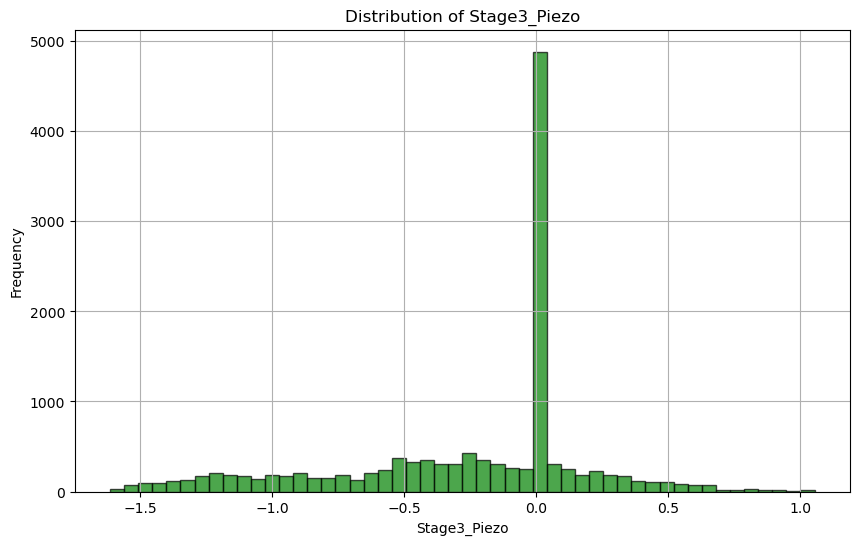

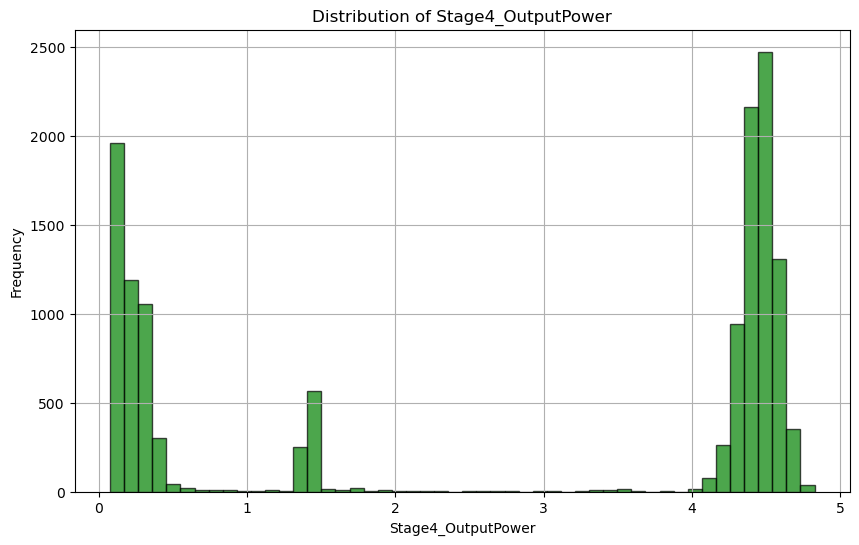

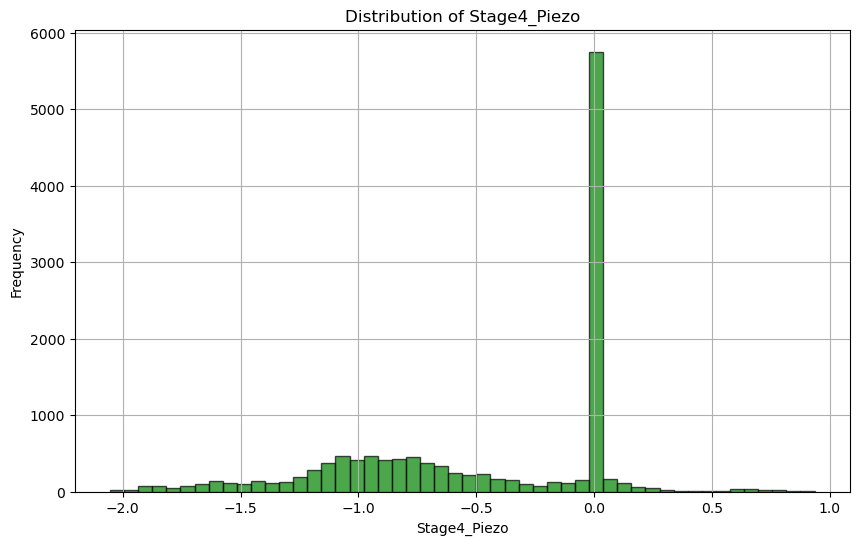

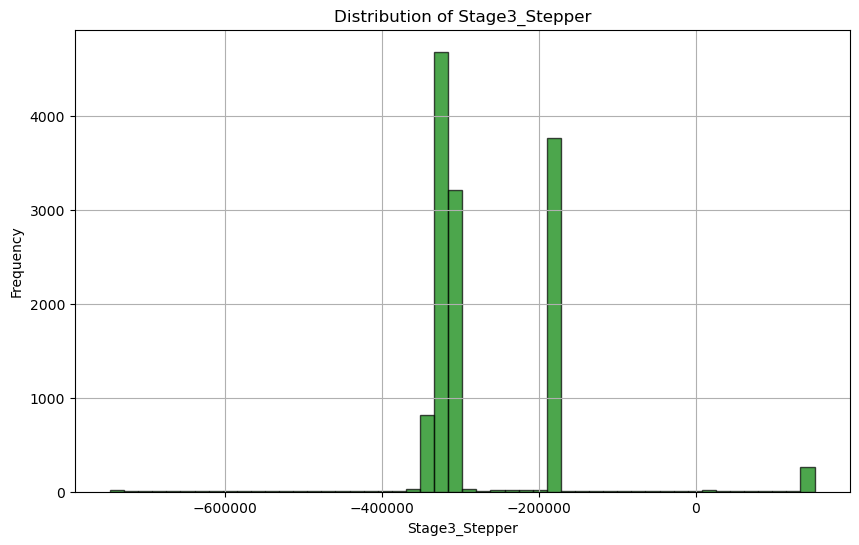

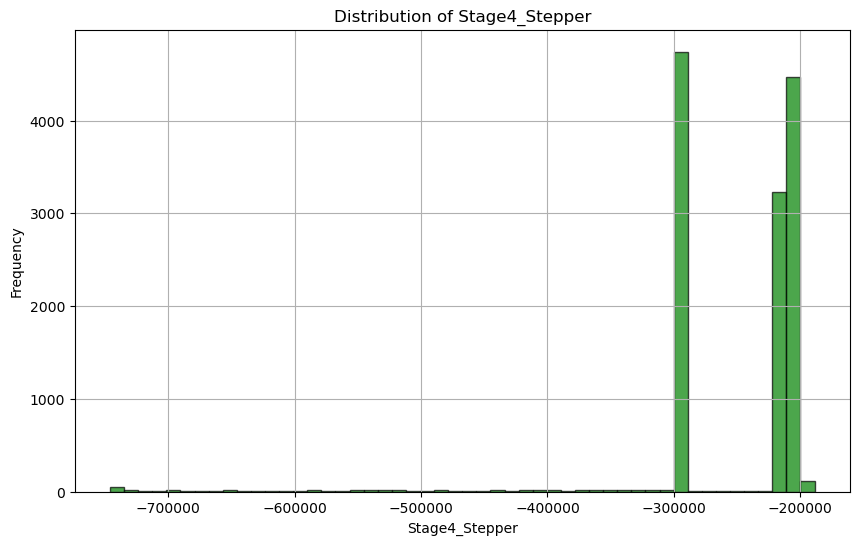

In [8]:
# List of features to plot
features = ['Stage3_OutputPower', 
            'Stage3_Piezo', 
            'Stage4_OutputPower', 
            'Stage4_Piezo', 
            'Stage3_Stepper', 
            'Stage4_Stepper']

# Plot distribution of unique values for each feature
for feature in features:
    plt.figure(figsize=(10, 6))
    df[feature].plot(kind='hist', bins=50, color='green', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Timestamps analysis
Mohla bys prosím udělat nějakou lehkou analýzu těch timestamps? 
* Jako jak velký mezery v čase bejvaj v parametrech vs ve spektrech, 
* jak velký by dávalo smysl to okno pro variantu 2. 
* A taky jestli tam nejsou nějaký třeba velký mezery? 
* Případně jak často se stává, že dřív přijdou dvě spektra po sobě, než další řádek parametrů? V takovým případě by se průměrovaly totiž i spektra.

## Time period from which the data are taken

### parameters

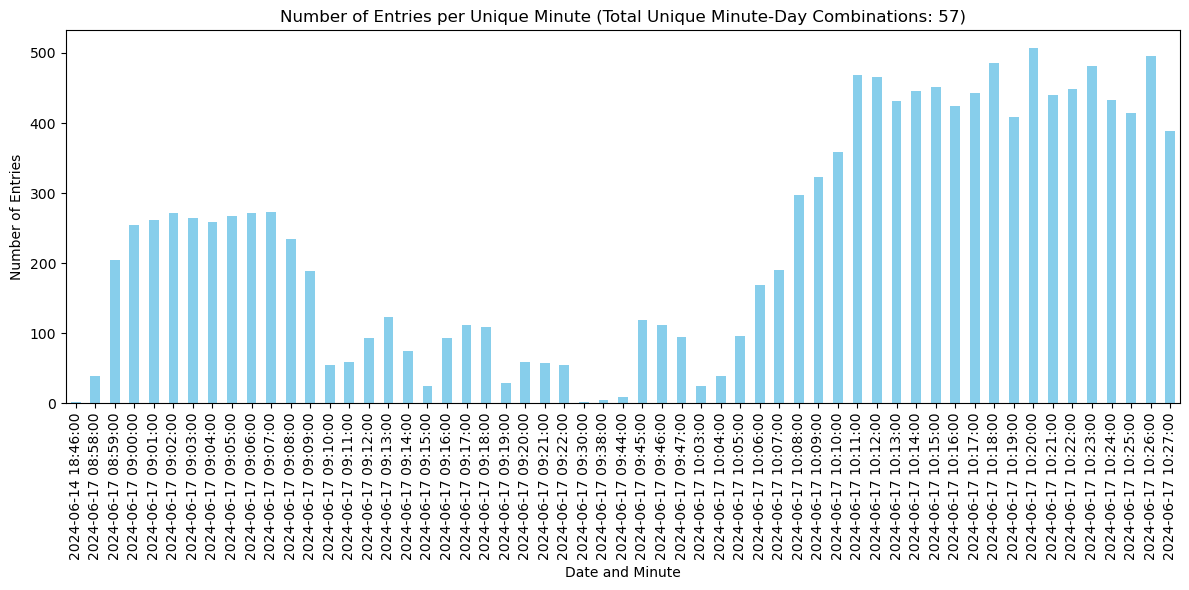

In [9]:
# Extract date and minute from the Time column
df['DateMinute'] = df['Time'].dt.strftime('%Y-%m-%d %H:%M:00')  # Combine date, hour, and minute

# Count the number of unique minute-day combinations
unique_date_minutes = df['DateMinute'].nunique()

# Convert 'DateMinute' to datetime for sorting
df['DateMinute'] = pd.to_datetime(df['DateMinute'])

# Plot unique minute-day combinations
plt.figure(figsize=(12, 6))
df['DateMinute'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title(f'Number of Entries per Unique Minute (Total Unique Minute-Day Combinations: {unique_date_minutes})')
plt.xlabel('Date and Minute')
plt.ylabel('Number of Entries')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### stage3

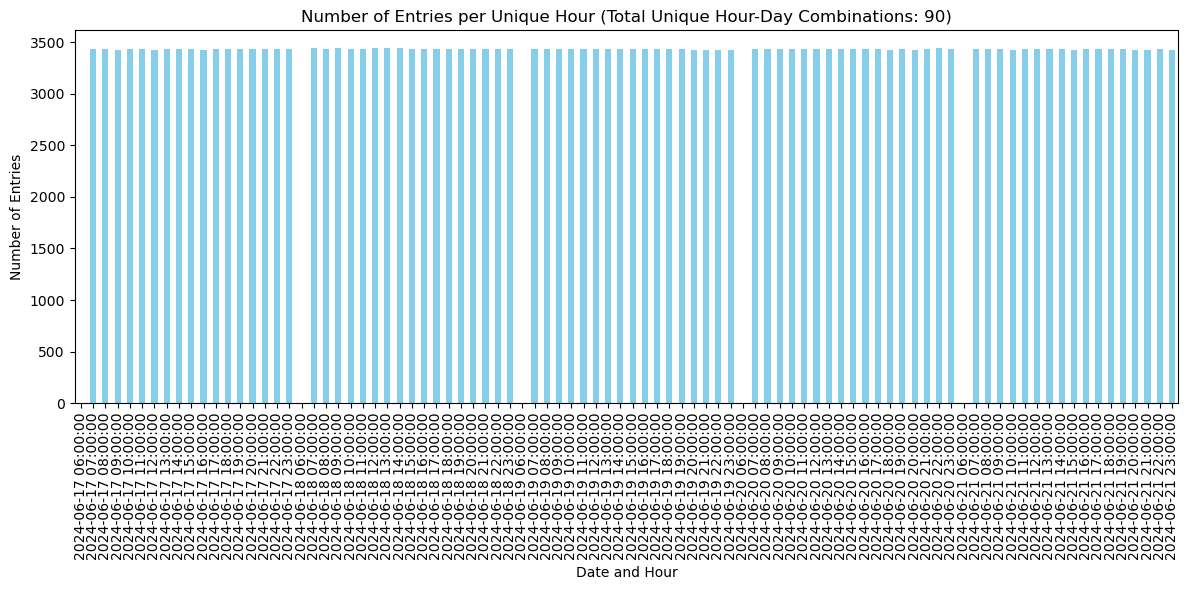

In [10]:
# Extract date and hour from the Time column
processed_stg3['DateHour'] = processed_stg3['Time'].dt.strftime('%Y-%m-%d %H:00:00')  # Combine date and hour

# Count the number of unique hour-day combinations
unique_date_hours_stg3 = processed_stg3['DateHour'].nunique()

# Convert 'DateHour' to datetime for sorting
processed_stg3['DateHour'] = pd.to_datetime(processed_stg3['DateHour'])

# Plot unique hour-day combinations for processed_stg3
plt.figure(figsize=(12, 6))
processed_stg3['DateHour'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title(f'Number of Entries per Unique Hour (Total Unique Hour-Day Combinations: {unique_date_hours_stg3})')
plt.xlabel('Date and Hour')
plt.ylabel('Number of Entries')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

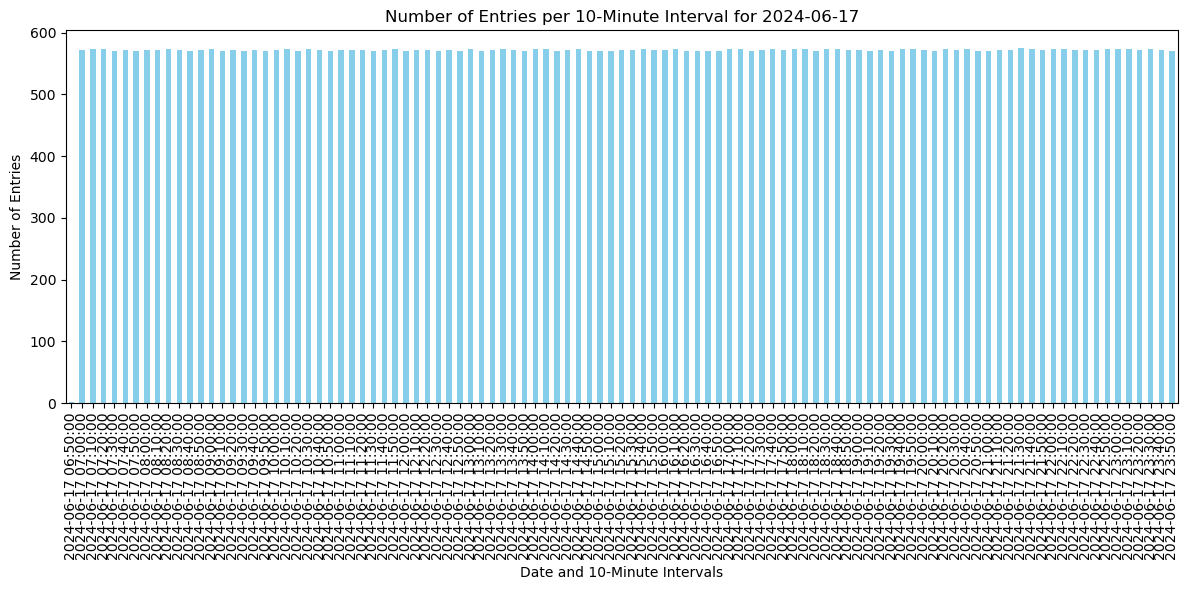

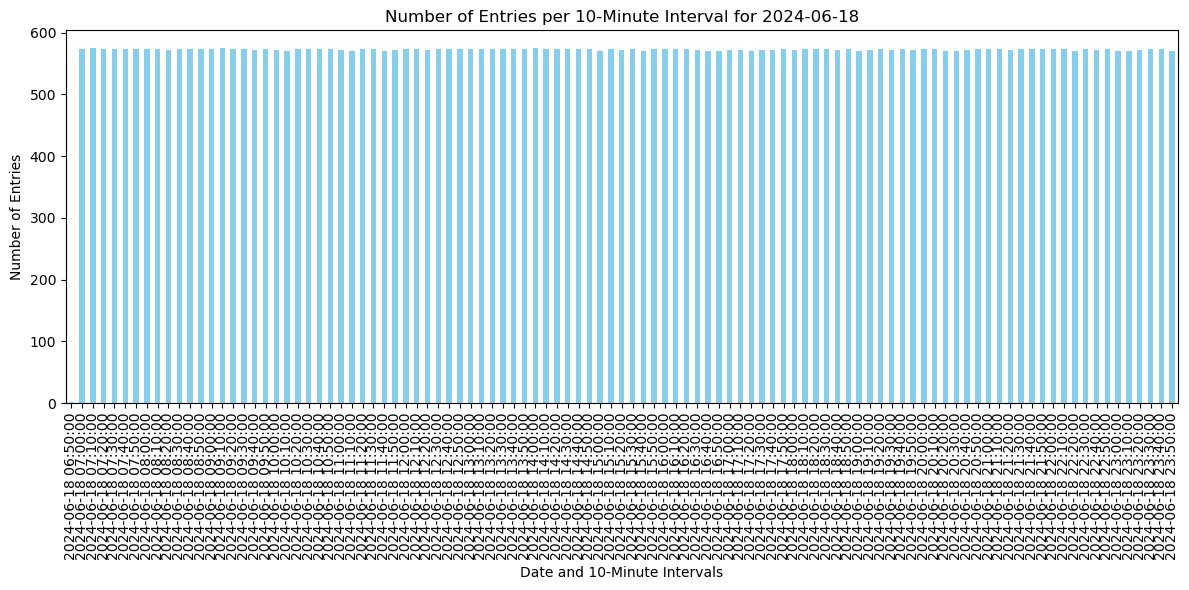

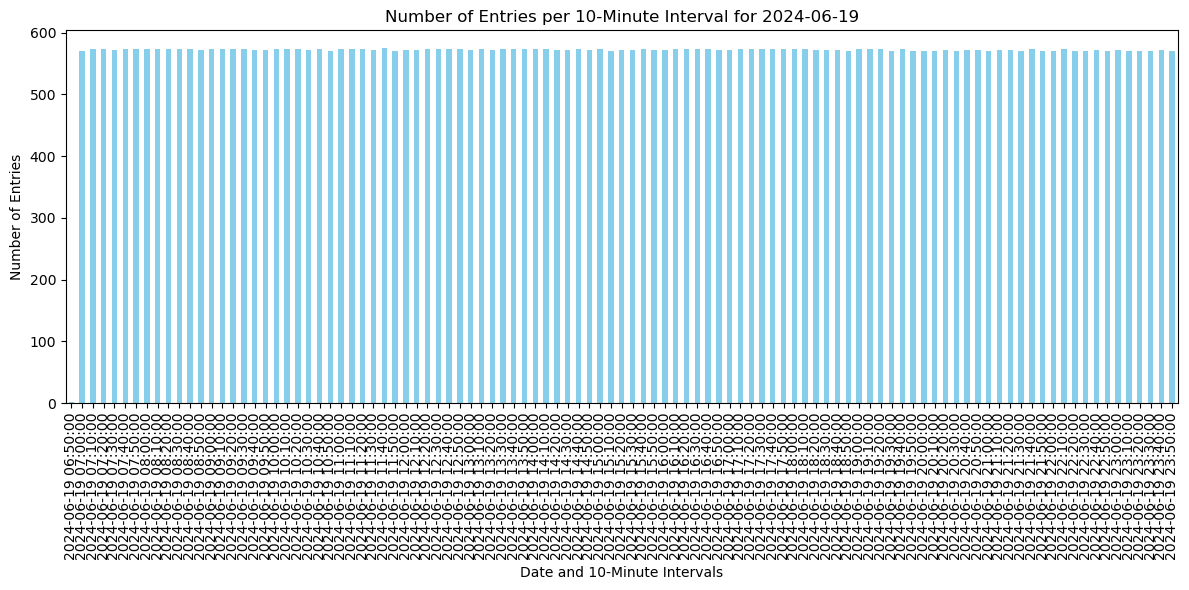

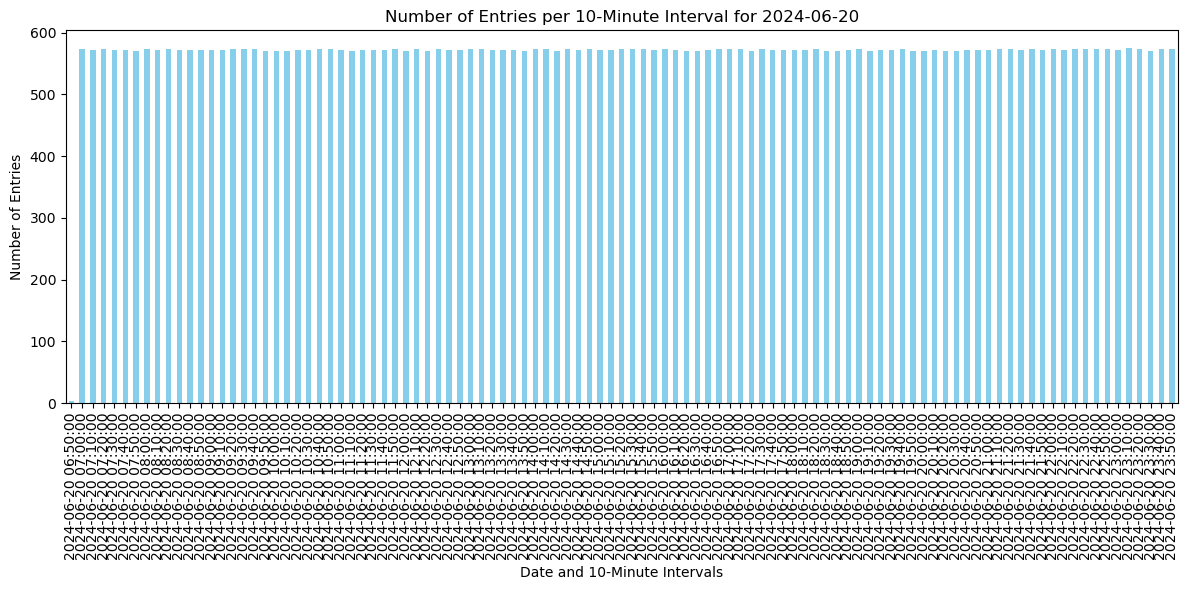

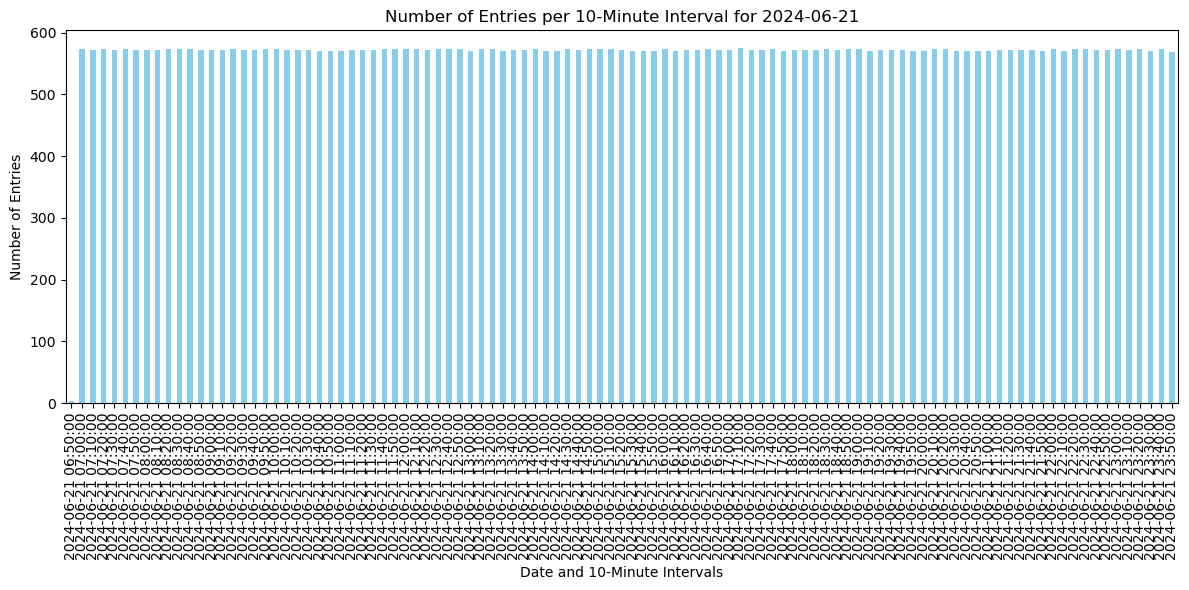

In [11]:
# Round Time to the nearest 10 minutes
processed_stg3['DateTenMin'] = processed_stg3['Time'].dt.floor('10T')  # '10T' means rounding to 10-minute intervals

# Extract the date (YYYY-MM-DD) for grouping by day
processed_stg3['Date'] = processed_stg3['Time'].dt.date  # Extract just the date

# Loop through each unique day and plot separate graphs for each
unique_dates_stg3 = processed_stg3['Date'].unique()  # Get unique dates

for date in unique_dates_stg3:
    # Filter data for the specific date
    df_day = processed_stg3[processed_stg3['Date'] == date]

    # Count the number of entries for each 10-minute interval in the day
    ten_minute_counts = df_day['DateTenMin'].value_counts().sort_index()

    # Plot the data for this specific day
    plt.figure(figsize=(12, 6))
    ten_minute_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Number of Entries per 10-Minute Interval for {date}')
    plt.xlabel('Date and 10-Minute Intervals')
    plt.ylabel('Number of Entries')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


### stage4

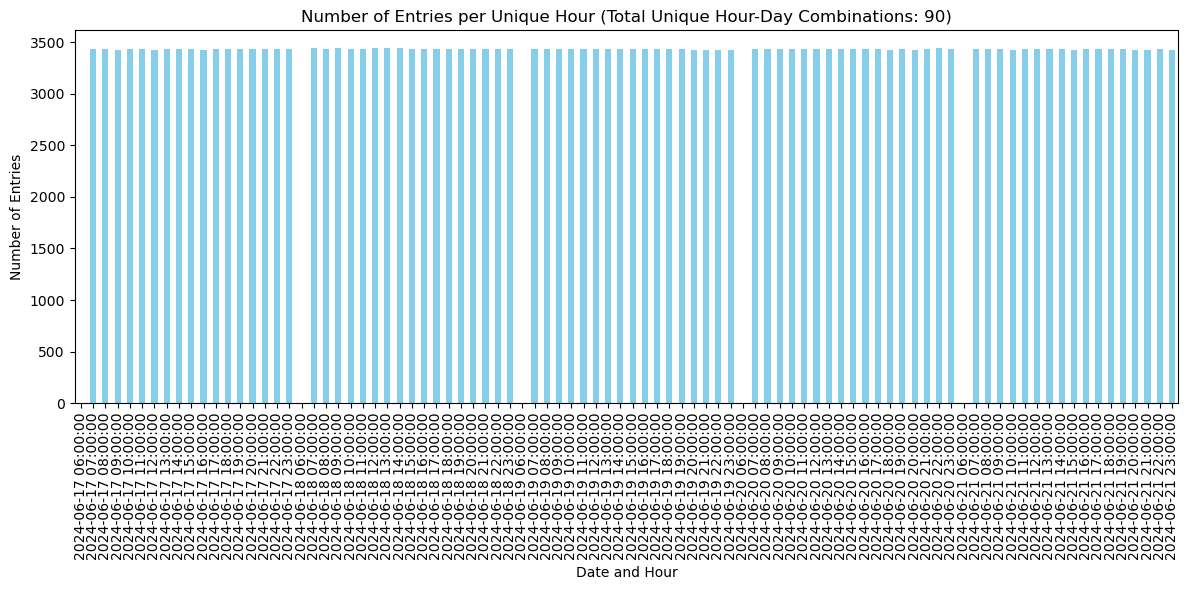

In [12]:
# Extract date and hour from the Time column
processed_stg4['DateHour'] = processed_stg4['Time'].dt.strftime('%Y-%m-%d %H:00:00')  # Combine date and hour

# Count the number of unique hour-day combinations
unique_date_hours_stg4 = processed_stg4['DateHour'].nunique()

# Convert 'DateHour' to datetime for sorting
processed_stg4['DateHour'] = pd.to_datetime(processed_stg4['DateHour'])

# Plot unique hour-day combinations for processed_stg3
plt.figure(figsize=(12, 6))
processed_stg4['DateHour'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title(f'Number of Entries per Unique Hour (Total Unique Hour-Day Combinations: {unique_date_hours_stg4})')
plt.xlabel('Date and Hour')
plt.ylabel('Number of Entries')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

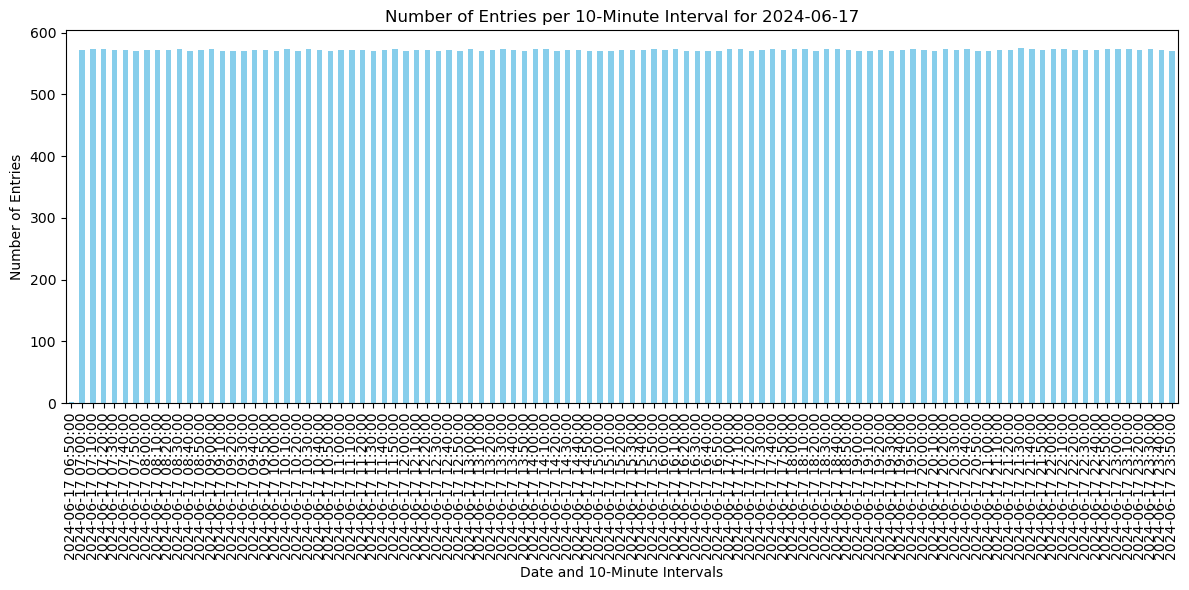

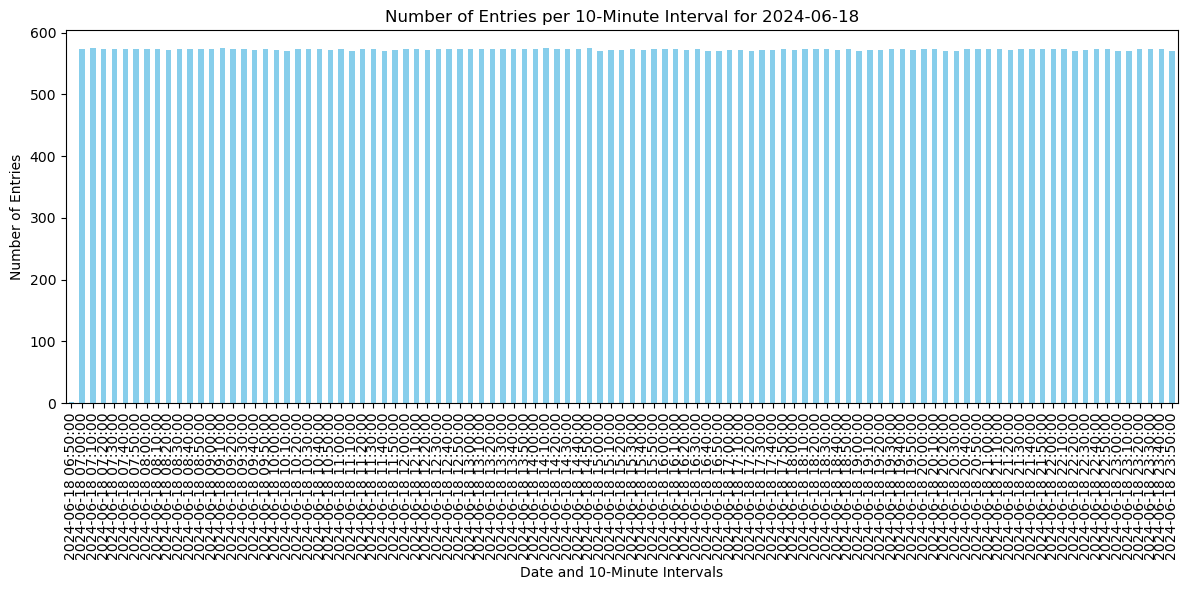

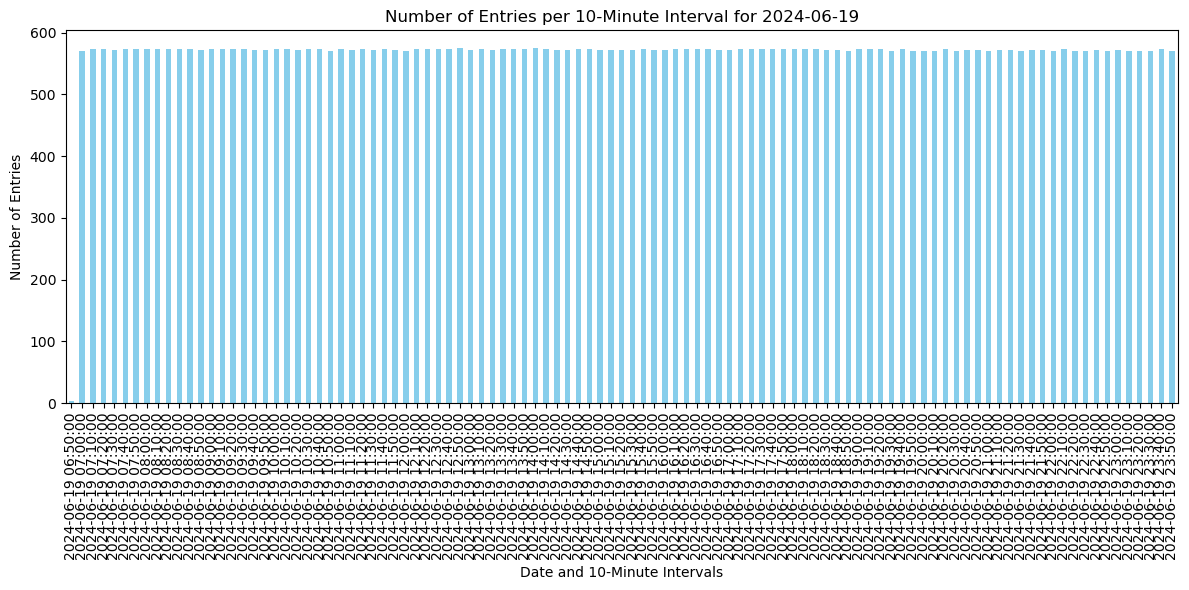

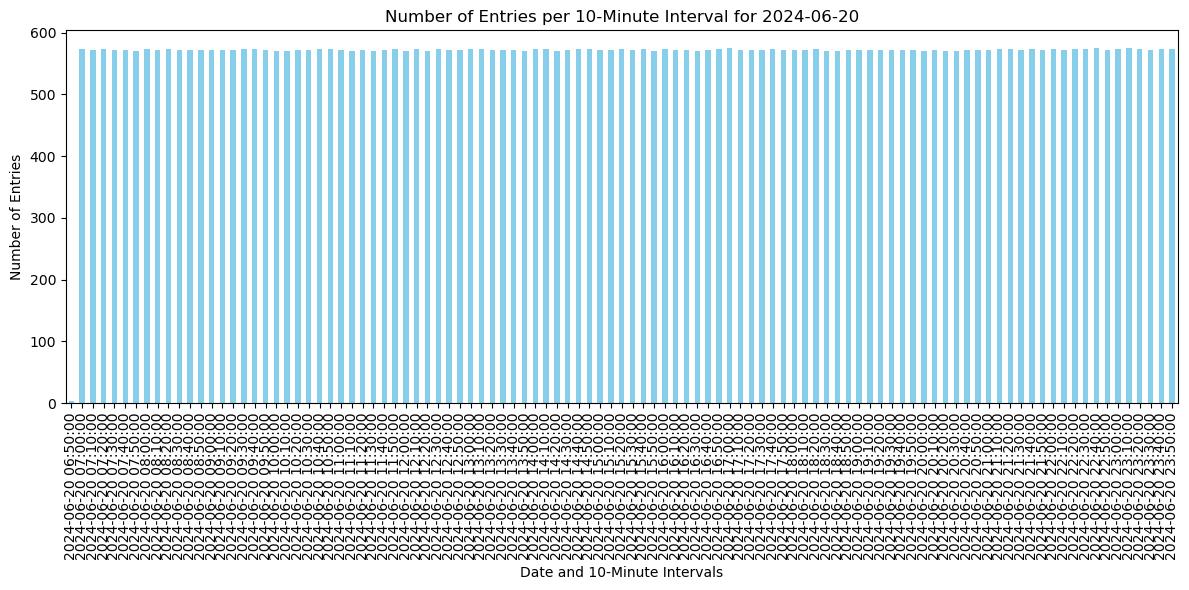

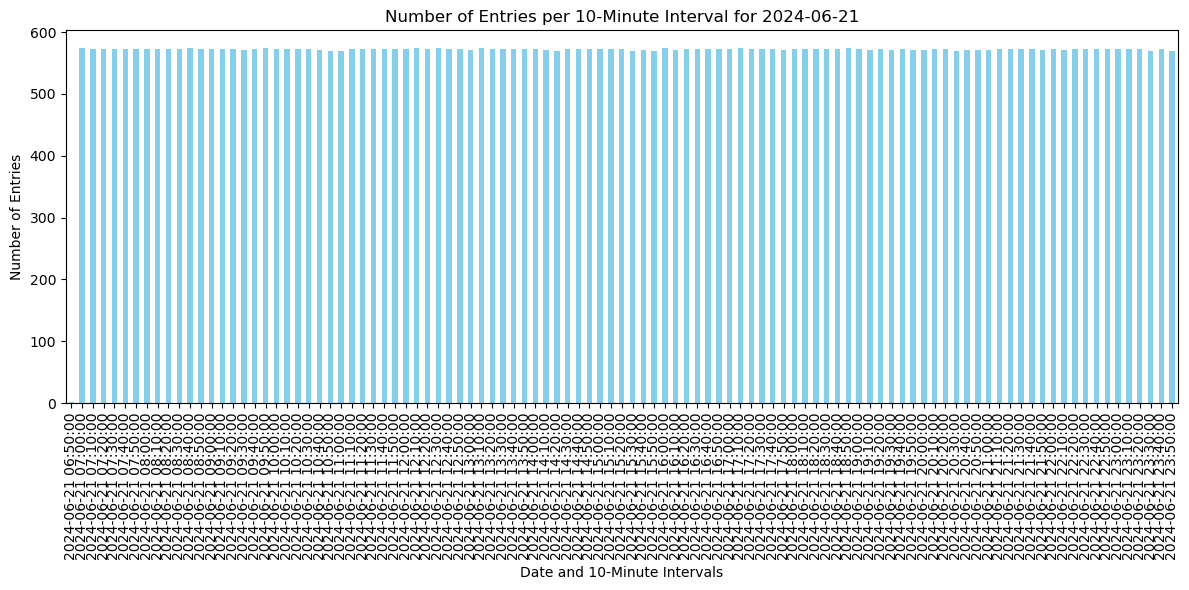

In [13]:
# Round Time to the nearest 10 minutes
processed_stg4['DateTenMin'] = processed_stg4['Time'].dt.floor('10T')  # '10T' means rounding to 10-minute intervals

# Extract the date (YYYY-MM-DD) for grouping by day
processed_stg4['Date'] = processed_stg4['Time'].dt.date  # Extract just the date

# Loop through each unique day and plot separate graphs for each
unique_dates_stg4 = processed_stg4['Date'].unique()  # Get unique dates

for date in unique_dates_stg4:
    # Filter data for the specific date
    df_day = processed_stg4[processed_stg4['Date'] == date]

    # Count the number of entries for each 10-minute interval in the day
    ten_minute_counts = df_day['DateTenMin'].value_counts().sort_index()

    # Plot the data for this specific day
    plt.figure(figsize=(12, 6))
    ten_minute_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Number of Entries per 10-Minute Interval for {date}')
    plt.xlabel('Date and 10-Minute Intervals')
    plt.ylabel('Number of Entries')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

## Timestamps frequencies in parameters and spectrums

In [14]:
# Sort both dataframes by the Time column
df = df.sort_values(by='Time').reset_index(drop=True)
processed_stg3 = processed_stg3.sort_values(by='Time').reset_index(drop=True)
processed_stg4 = processed_stg4.sort_values(by='Time').reset_index(drop=True)


### Parameters

In [15]:
df['Time_Diff'] = df['Time'].diff()
df.head()

,Time,Stage3_OutputPower,Stage3_Piezo,Stage4_OutputPower,Stage4_Piezo,Stage3_Stepper,Stage4_Stepper,DateMinute,Time_Diff
0,2024-06-14 18:46:29.766817093,0.017161,0.0,0.083602,0.0,-176387.0,-289957.0,2024-06-14 18:46:00,NaT
1,2024-06-17 08:58:45.360144138,0.017161,0.0,0.153892,0.0,-176387.0,-289957.0,2024-06-17 08:58:00,2 days 14:12:15.593327045
2,2024-06-17 08:58:45.609766960,0.072318,0.0,0.153892,0.0,-176387.0,-289957.0,2024-06-17 08:58:00,0 days 00:00:00.249622822
3,2024-06-17 08:58:46.115516186,0.072318,0.0,0.223622,0.0,-176387.0,-289957.0,2024-06-17 08:58:00,0 days 00:00:00.505749226
4,2024-06-17 08:58:46.396927834,0.072318,0.0,0.089850,0.0,-176387.0,-289957.0,2024-06-17 08:58:00,0 days 00:00:00.281411648


In [16]:
# Convert Time_Diff to total milliseconds
df['Time_Diff_MS'] = df['Time_Diff'].dt.total_seconds() * 1000

# Step 2: Filter for entries where Time_Diff is less than one hour (3600 seconds)
filtered_df = df[df['Time_Diff'].dt.total_seconds() < 3600]

# Step 3: Calculate statistics on the filtered data
mean_time_diff = filtered_df['Time_Diff_MS'].mean()
median_time_diff = filtered_df['Time_Diff_MS'].median()
std_time_diff = filtered_df['Time_Diff_MS'].std()
min_time_diff = filtered_df['Time_Diff_MS'].min()
max_time_diff = filtered_df['Time_Diff_MS'].max()
percentiles = filtered_df['Time_Diff_MS'].quantile([0.25, 0.5, 0.75])

# Print basic stats
print("Mean Time Gap (Milliseconds):", mean_time_diff)
print("Median Time Gap (Milliseconds):", median_time_diff)
print("Standard Deviation of Time Gaps (Milliseconds):", std_time_diff)
print("Minimum Time Gap (Milliseconds):", min_time_diff)
print("Maximum Time Gap (Milliseconds):", max_time_diff)
print("25th, 50th, 75th Percentiles (Milliseconds):", percentiles)


Mean Time Gap (Milliseconds): 405.4718005655402
Median Time Gap (Milliseconds): 197.996378
Standard Deviation of Time Gaps (Milliseconds): 10443.663748144601
Minimum Time Gap (Milliseconds): 0.017166
Maximum Time Gap (Milliseconds): 929070.398808
25th, 50th, 75th Percentiles (Milliseconds): 0.25      7.084251
0.50    197.996378
0.75    261.777878
Name: Time_Diff_MS, dtype: float64


### stage3

In [17]:
# Calculate the difference in time
processed_stg3['Time_Diff'] = processed_stg3['Time'].diff()

# Convert Time_Diff to total milliseconds
processed_stg3['Time_Diff_MS'] = processed_stg3['Time_Diff'].dt.total_seconds() * 1000

# Step 2: Filter for entries where Time_Diff is less than one hour (3600 seconds)
filtered_df = processed_stg3[processed_stg3['Time_Diff'].dt.total_seconds() < 3600]

# Step 3: Calculate statistics on the filtered data
mean_time_diff = filtered_df['Time_Diff_MS'].mean()
median_time_diff = filtered_df['Time_Diff_MS'].median()
std_time_diff = filtered_df['Time_Diff_MS'].std()
min_time_diff = filtered_df['Time_Diff_MS'].min()
max_time_diff = filtered_df['Time_Diff_MS'].max()
percentiles = filtered_df['Time_Diff_MS'].quantile([0.25, 0.5, 0.75])

# Print basic stats
print("Mean Time Gap (Milliseconds):", mean_time_diff)
print("Median Time Gap (Milliseconds):", median_time_diff)
print("Standard Deviation of Time Gaps (Milliseconds):", std_time_diff)
print("Minimum Time Gap (Milliseconds):", min_time_diff)
print("Maximum Time Gap (Milliseconds):", max_time_diff)
print("25th, 50th, 75th Percentiles (Milliseconds):", percentiles)


Mean Time Gap (Milliseconds): 1048.3029404624303
Median Time Gap (Milliseconds): 1004.103661
Standard Deviation of Time Gaps (Milliseconds): 164.71389068965945
Minimum Time Gap (Milliseconds): 265.758514
Maximum Time Gap (Milliseconds): 4529.541015999999
25th, 50th, 75th Percentiles (Milliseconds): 0.25     906.810045
0.50    1004.103661
0.75    1163.336515
Name: Time_Diff_MS, dtype: float64


### stage4

In [18]:
# Calculate the difference in time
processed_stg4['Time_Diff'] = processed_stg4['Time'].diff()

# Convert Time_Diff to total milliseconds
processed_stg4['Time_Diff_MS'] = processed_stg4['Time_Diff'].dt.total_seconds() * 1000

# Step 2: Filter for entries where Time_Diff is less than one hour (3600 seconds)
filtered_df = processed_stg4[processed_stg4['Time_Diff'].dt.total_seconds() < 3600]

# Step 3: Calculate statistics on the filtered data
mean_time_diff = filtered_df['Time_Diff_MS'].mean()
median_time_diff = filtered_df['Time_Diff_MS'].median()
std_time_diff = filtered_df['Time_Diff_MS'].std()
min_time_diff = filtered_df['Time_Diff_MS'].min()
max_time_diff = filtered_df['Time_Diff_MS'].max()
percentiles = filtered_df['Time_Diff_MS'].quantile([0.25, 0.5, 0.75])

# Print basic stats
print("Mean Time Gap (Milliseconds):", mean_time_diff)
print("Median Time Gap (Milliseconds):", median_time_diff)
print("Standard Deviation of Time Gaps (Milliseconds):", std_time_diff)
print("Minimum Time Gap (Milliseconds):", min_time_diff)
print("Maximum Time Gap (Milliseconds):", max_time_diff)
print("25th, 50th, 75th Percentiles (Milliseconds):", percentiles)


Mean Time Gap (Milliseconds): 1048.3017641683623
Median Time Gap (Milliseconds): 1004.0898325
Standard Deviation of Time Gaps (Milliseconds): 164.68950915006388
Minimum Time Gap (Milliseconds): 401.884079
Maximum Time Gap (Milliseconds): 4527.459145
25th, 50th, 75th Percentiles (Milliseconds): 0.25     906.808853
0.50    1004.089833
0.75    1164.147496
Name: Time_Diff_MS, dtype: float64


## Mapping time

### parameters and stage3

In [19]:
# Define the time range for filtering
start_time0 = pd.Timestamp('2024-06-17 08:58:00')
start_time1 = pd.Timestamp('2024-06-17 08:59:00')
end_time = pd.Timestamp('2024-06-17 10:27:00')

# Filter the DataFrames based on the specified time range
filtered_processed_stg3 = processed_stg3[(processed_stg3['Time'] >= start_time1) & (processed_stg3['Time'] <= end_time)]
filtered_df = df[(df['Time'] >= start_time0) & (df['Time'] <= end_time)]

# Filter just Time columns
filtered_processed_stg3 = filtered_processed_stg3[["Time"]]
filtered_df = filtered_df[["Time"]]
filtered_df['idx'] = filtered_df.index

# Merge the DataFrames to find closest previous times in df for each row in processed_stg3
closest_times = pd.merge_asof(filtered_processed_stg3.rename(columns={'Time':'Time_spectrum'}),
                              filtered_df.rename(columns={'Time':'Time_parameters'}),
                              left_on='Time_spectrum',
                              right_on='Time_parameters',
                              direction='backward')

closest_times.head(100)

,Time_spectrum,Time_parameters,idx
0,2024-06-17 08:59:00.630595207,2024-06-17 08:58:59.909673214,39
1,2024-06-17 08:59:01.941629410,2024-06-17 08:59:01.923128128,44
2,2024-06-17 08:59:02.799632072,2024-06-17 08:59:02.687496185,48
3,2024-06-17 08:59:03.752634525,2024-06-17 08:59:03.681166172,53
4,2024-06-17 08:59:04.812631130,2024-06-17 08:59:04.682624817,59
...,...,...,...
95,2024-06-17 09:00:39.862147331,2024-06-17 09:00:39.784581184,415
96,2024-06-17 09:00:40.870144844,2024-06-17 09:00:40.790317059,421
97,2024-06-17 09:00:42.181142330,2024-06-17 09:00:42.045065880,427
98,2024-06-17 09:00:43.142146587,2024-06-17 09:00:43.054828167,434


#### Cases where two specters comes before parameters

In [20]:
# Identify rows where the current idx equals the previous idx
same_idx_rows = closest_times[closest_times['idx'] == closest_times['idx'].shift()]

# Display the resulting DataFrame
print("Rows with the same idx value under each other:")
print(same_idx_rows)

Rows with the same idx value under each other:
                     Time_spectrum               Time_parameters   idx
32   2024-06-17 08:59:34.139300823 2024-06-17 08:59:32.858325005   143
602  2024-06-17 09:09:30.844064236 2024-06-17 09:09:28.918118000  2718
603  2024-06-17 09:09:31.748065472 2024-06-17 09:09:28.918118000  2718
631  2024-06-17 09:10:01.358248711 2024-06-17 09:10:00.204398155  2791
632  2024-06-17 09:10:02.413228989 2024-06-17 09:10:00.204398155  2791
...                            ...                           ...   ...
3916 2024-06-17 10:07:31.013077736 2024-06-17 10:07:28.777163029  4487
3917 2024-06-17 10:07:32.268051147 2024-06-17 10:07:28.777163029  4487
3940 2024-06-17 10:07:56.215841770 2024-06-17 10:07:55.132982254  4577
3941 2024-06-17 10:07:57.575215816 2024-06-17 10:07:55.132982254  4577
3949 2024-06-17 10:08:05.882599354 2024-06-17 10:08:03.764763355  4605

[2532 rows x 3 columns]


#### Time difference between spectrum data and parameters

In [21]:
closest_times['time_diff'] = (closest_times['Time_spectrum'] - closest_times['Time_parameters']).dt.total_seconds()
closest_times.head()

,Time_spectrum,Time_parameters,idx,time_diff
0,2024-06-17 08:59:00.630595207,2024-06-17 08:58:59.909673214,39,0.720922
1,2024-06-17 08:59:01.941629410,2024-06-17 08:59:01.923128128,44,0.018501
2,2024-06-17 08:59:02.799632072,2024-06-17 08:59:02.687496185,48,0.112136
3,2024-06-17 08:59:03.752634525,2024-06-17 08:59:03.681166172,53,0.071468
4,2024-06-17 08:59:04.812631130,2024-06-17 08:59:04.682624817,59,0.130006


In [22]:
# Compute statistics for the 'time_diff' column
mean_time_diff = closest_times['time_diff'].mean()
median_time_diff = closest_times['time_diff'].median()
min_time_diff = closest_times['time_diff'].min()
max_time_diff = closest_times['time_diff'].max()
std_time_diff = closest_times['time_diff'].std()

# Percentiles
percentiles = closest_times['time_diff'].quantile([0.25, 0.5, 0.75])

# Display the results
print("Statistics for 'time_diff':")
print(f"Mean: {mean_time_diff}")
print(f"Median: {median_time_diff}")
print(f"Min: {min_time_diff}")
print(f"Max: {max_time_diff}")
print(f"Standard Deviation: {std_time_diff}")
print(f"25th Percentile: {percentiles[0.25]}")
print(f"50th Percentile (Median): {percentiles[0.5]}")
print(f"75th Percentile: {percentiles[0.75]}")

Statistics for 'time_diff':
Mean: 136.35530726074742
Median: 1.1377012734999998
Min: 1.0967e-05
Max: 928.675494194
Standard Deviation: 219.0509213286771
25th Percentile: 0.15847790275
50th Percentile (Median): 1.1377012734999998
75th Percentile: 227.7412599325


In [23]:
# Find the index of the row with the highest time_diff
max_time_diff_index = closest_times['time_diff'].idxmax()

# Retrieve the row with the highest time_diff
row_with_highest_time_diff = closest_times.loc[max_time_diff_index]

# Display the result
print("Row with the highest time_diff:")
print(row_with_highest_time_diff)

Row with the highest time_diff:
Time_spectrum      2024-06-17 10:03:16.612709522
Time_parameters    2024-06-17 09:47:47.937215328
idx                                         4069
time_diff                             928.675494
Name: 3673, dtype: object


In [24]:
closest_times[closest_times['time_diff'] > 100]

,Time_spectrum,Time_parameters,idx,time_diff
1464,2024-06-17 09:24:35.943923950,2024-06-17 09:22:55.549584866,3730,100.394339
1465,2024-06-17 09:24:37.251927853,2024-06-17 09:22:55.549584866,3730,101.702343
1466,2024-06-17 09:24:38.206927299,2024-06-17 09:22:55.549584866,3730,102.657342
1467,2024-06-17 09:24:39.161920071,2024-06-17 09:22:55.549584866,3730,103.612335
1468,2024-06-17 09:24:40.218348026,2024-06-17 09:22:55.549584866,3730,104.668763
...,...,...,...,...
3669,2024-06-17 10:03:12.442704201,2024-06-17 09:47:47.937215328,4069,924.505489
3670,2024-06-17 10:03:13.347712040,2024-06-17 09:47:47.937215328,4069,925.410497
3671,2024-06-17 10:03:14.248711109,2024-06-17 09:47:47.937215328,4069,926.311496
3672,2024-06-17 10:03:15.357707024,2024-06-17 09:47:47.937215328,4069,927.420492


### parameters and stage4

In [25]:
# Define the time range for filtering
start_time0 = pd.Timestamp('2024-06-17 08:58:00')
start_time1 = pd.Timestamp('2024-06-17 08:59:00')
end_time = pd.Timestamp('2024-06-17 10:27:00')

# Filter the DataFrames based on the specified time range
filtered_processed_stg4 = processed_stg4[(processed_stg4['Time'] >= start_time1) & (processed_stg4['Time'] <= end_time)]
filtered_df = df[(df['Time'] >= start_time0) & (df['Time'] <= end_time)]

# filter just Time columns
filtered_processed_stg4 = filtered_processed_stg4[["Time"]]
filtered_df = filtered_df[["Time"]]
filtered_df['idx'] = filtered_df.index

# 2. Merge the DataFrames to find closest previous times in df for each row in processed_stg4
closest_times = pd.merge_asof(filtered_processed_stg4.rename(columns={'Time':'Time_spectrum'}),
                              filtered_df.rename(columns={'Time':'Time_parameters'}),
                              left_on='Time_spectrum',
                              right_on='Time_parameters',
                              direction='backward')
closest_times.head(100)

,Time_spectrum,Time_parameters,idx
0,2024-06-17 08:59:00.780633450,2024-06-17 08:58:59.909673214,39
1,2024-06-17 08:59:02.043632984,2024-06-17 08:59:01.923128128,44
2,2024-06-17 08:59:02.948632717,2024-06-17 08:59:02.924836159,49
3,2024-06-17 08:59:03.904633522,2024-06-17 08:59:03.681166172,53
4,2024-06-17 08:59:04.960632801,2024-06-17 08:59:04.682624817,59
...,...,...,...
95,2024-06-17 09:00:40.016143799,2024-06-17 09:00:39.784581184,415
96,2024-06-17 09:00:41.022147179,2024-06-17 09:00:40.790317059,421
97,2024-06-17 09:00:42.332149029,2024-06-17 09:00:42.297514915,428
98,2024-06-17 09:00:43.192145824,2024-06-17 09:00:43.054828167,434


#### Cases where two specters comes before parameters

In [26]:
# Identify rows where the current idx equals the previous idx
same_idx_rows = closest_times[closest_times['idx'] == closest_times['idx'].shift()]

# Display the resulting DataFrame
print("Rows with the same idx value under each other:")
print(same_idx_rows)

Rows with the same idx value under each other:
                     Time_spectrum               Time_parameters   idx
14   2024-06-17 08:59:15.522633553 2024-06-17 08:59:14.472586155    88
32   2024-06-17 08:59:34.237629414 2024-06-17 08:59:32.858325005   143
119  2024-06-17 09:01:05.319859028 2024-06-17 09:01:04.373449802   516
602  2024-06-17 09:09:30.994065762 2024-06-17 09:09:28.918118000  2718
603  2024-06-17 09:09:31.901060104 2024-06-17 09:09:28.918118000  2718
...                            ...                           ...   ...
3916 2024-06-17 10:07:31.162042618 2024-06-17 10:07:28.777163029  4487
3917 2024-06-17 10:07:32.421291828 2024-06-17 10:07:28.777163029  4487
3940 2024-06-17 10:07:56.416331768 2024-06-17 10:07:55.132982254  4577
3941 2024-06-17 10:07:57.677293777 2024-06-17 10:07:55.132982254  4577
3949 2024-06-17 10:08:05.985599995 2024-06-17 10:08:03.764763355  4605

[2536 rows x 3 columns]


#### Time difference between spectrum data and parameters

In [27]:
closest_times['time_diff'] = (closest_times['Time_spectrum'] - closest_times['Time_parameters']).dt.total_seconds()
closest_times.head()

,Time_spectrum,Time_parameters,idx,time_diff
0,2024-06-17 08:59:00.780633450,2024-06-17 08:58:59.909673214,39,0.870960
1,2024-06-17 08:59:02.043632984,2024-06-17 08:59:01.923128128,44,0.120505
2,2024-06-17 08:59:02.948632717,2024-06-17 08:59:02.924836159,49,0.023797
3,2024-06-17 08:59:03.904633522,2024-06-17 08:59:03.681166172,53,0.223467
4,2024-06-17 08:59:04.960632801,2024-06-17 08:59:04.682624817,59,0.278008


In [28]:
# Compute statistics for the 'time_diff' column
mean_time_diff = closest_times['time_diff'].mean()
median_time_diff = closest_times['time_diff'].median()
min_time_diff = closest_times['time_diff'].min()
max_time_diff = closest_times['time_diff'].max()
std_time_diff = closest_times['time_diff'].std()

# Percentiles
percentiles = closest_times['time_diff'].quantile([0.25, 0.5, 0.75])

# Display the results
print("Statistics for 'time_diff':")
print(f"Mean: {mean_time_diff}")
print(f"Median: {median_time_diff}")
print(f"Min: {min_time_diff}")
print(f"Max: {max_time_diff}")
print(f"Standard Deviation: {std_time_diff}")
print(f"25th Percentile: {percentiles[0.25]}")
print(f"50th Percentile (Median): {percentiles[0.5]}")
print(f"75th Percentile: {percentiles[0.75]}")

Statistics for 'time_diff':
Mean: 136.35806254112023
Median: 1.120940208
Min: 2.9564e-05
Max: 928.826490402
Standard Deviation: 219.09567749095567
25th Percentile: 0.16503930049999999
50th Percentile (Median): 1.120940208
75th Percentile: 227.5163397785


In [29]:
# Find the index of the row with the highest time_diff
max_time_diff_index = closest_times['time_diff'].idxmax()

# Retrieve the row with the highest time_diff
row_with_highest_time_diff = closest_times.loc[max_time_diff_index]

# Display the result
print("Row with the highest time_diff:")
print(row_with_highest_time_diff)

Row with the highest time_diff:
Time_spectrum      2024-06-17 10:03:16.763705730
Time_parameters    2024-06-17 09:47:47.937215328
idx                                         4069
time_diff                              928.82649
Name: 3673, dtype: object


In [30]:
closest_times[closest_times['time_diff'] > 100]

,Time_spectrum,Time_parameters,idx,time_diff
1464,2024-06-17 09:24:36.044926167,2024-06-17 09:22:55.549584866,3730,100.495341
1465,2024-06-17 09:24:37.400926590,2024-06-17 09:22:55.549584866,3730,101.851342
1466,2024-06-17 09:24:38.309925556,2024-06-17 09:22:55.549584866,3730,102.760341
1467,2024-06-17 09:24:39.263926983,2024-06-17 09:22:55.549584866,3730,103.714342
1468,2024-06-17 09:24:40.318336010,2024-06-17 09:22:55.549584866,3730,104.768751
...,...,...,...,...
3669,2024-06-17 10:03:12.543706417,2024-06-17 09:47:47.937215328,4069,924.606491
3670,2024-06-17 10:03:13.497706413,2024-06-17 09:47:47.937215328,4069,925.560491
3671,2024-06-17 10:03:14.449709415,2024-06-17 09:47:47.937215328,4069,926.512494
3672,2024-06-17 10:03:15.508705616,2024-06-17 09:47:47.937215328,4069,927.571490
